In [1]:
import numpy as np
import random as rd
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Import plotly package
import plotly
plotly.tools.set_credentials_file(username='davide.schenone', api_key='WBSgVI0FXgSIRecK2cHU')
import plotly.graph_objs as go

# Check ploltly version
plotly.__version__

# To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py
from pandas import ExcelWriter
from pandas import ExcelFile


#sfera 1
phi= 2*math.pi*np.random.random_sample((1000,))
teta= 2*math.pi*np.random.random_sample((1000,))
r_1=100
x = (r_1 * np.cos(teta))*np.sin(phi)
y = (r_1 * np.sin(teta))*np.sin(phi)
z = r_1 * np.cos(phi)


#sfera 2
phi_2= 2*math.pi*np.random.random_sample((1000,))
teta_2= 2*math.pi*np.random.random_sample((1000,))
r_2=200
x_2 = (r_2 * np.cos(teta))*np.sin(phi)
y_2 = (r_2 * np.sin(teta))*np.sin(phi)
z_2 = r_2 * np.cos(phi)

#sfera 3
phi_2= 2*math.pi*np.random.random_sample((1000000,)) #devo aumentare la densità di punti sulla superficie
teta_2= 2*math.pi*np.random.random_sample((1000000,))
r_3=300
x_3 = (r_3 * np.cos(teta))*np.sin(phi)
y_3 = (r_3 * np.sin(teta))*np.sin(phi)
z_3 = r_3 * np.cos(phi)

#plotto gli array sopra creati
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = x
ys = y
zs = z
ax.scatter(xs, ys, zs)
ax.scatter(x_2, y_2, z_2)
ax.scatter(x_3, y_3, z_3)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


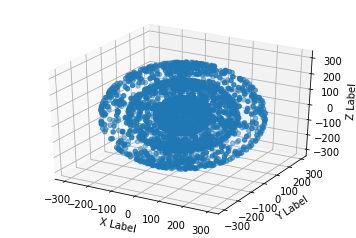

In [2]:
#unisco il tutto in un unico array
x_tot = np.concatenate((x,x_2,x_3))
y_tot = np.concatenate((y,y_2,y_3))
z_tot = np.concatenate((z,z_2,z_3))
#plotto l'array
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_tot, y_tot, z_tot)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [3]:
matrix = np.matrix([x_tot,y_tot,z_tot])

matrix = np.transpose(matrix)


In [4]:
from sklearn.cluster import DBSCAN
from collections import Counter

db = DBSCAN(eps=60, min_samples=10).fit(matrix)
labels = db.labels_
data = pd.DataFrame(matrix, columns=('x','y','z',)) #creo un dataframe
data = data.assign(Classe_spaziale = labels)

Counter(labels)

Counter({-1: 122,
         0: 1000,
         1: 1000,
         2: 343,
         3: 329,
         4: 24,
         5: 74,
         6: 17,
         7: 15,
         8: 21,
         9: 13,
         10: 10,
         11: 3,
         12: 14,
         13: 6,
         14: 9})

# Imposto il cluster su cui fare il plot

In [5]:
#filtro la label di interesse
data = data[data['Classe_spaziale'] == 2]

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~davide.schenone/0 or inside your plot.ly account where it is named 'test1'


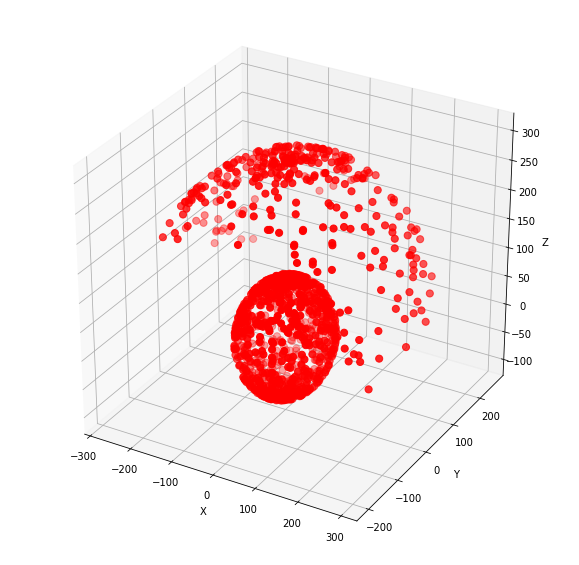

In [6]:
#x = data['x']  
    
#y = data['y']   
    
#z = data['z']



data =  data.as_matrix(columns=['x','y','z'])
# plot points and fitted surface using Matplotlib
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)

ax.scatter(x, y, z, c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

# plot points and fitted surface using Plotly
trace1 = go.Scatter3d(
    x=data[:,0],
    y=data[:,1],
    z=data[:,2],
    mode='markers',
    marker=dict(size=4, color='red', line=dict(color='black', width=0.5), opacity=0.85)
)

#trace2 = go.Surface(z=Z, x=X, y=Y, colorscale='RdBu', opacity=0.6)

# Package the trace dictionary into a data object
data_test1 = go.Data([trace1])

# Dictionary of style options for all axes
axis = dict(
    showbackground=True, # show axis background
    backgroundcolor="rgb(204, 204, 204)", # set background color to grey
    gridcolor="rgb(255, 255, 255)",       # set grid line color
    zerolinecolor="rgb(255, 255, 255)",   # set zero grid line color
)

# Make a layout object
layout = go.Layout(
    title='1st-order (linear) plane', # set plot title
    scene=go.Scene(  # axes are part of a 'scene' in 3d plots
        xaxis=go.XAxis(axis), # set x-axis style
        yaxis=go.YAxis(axis), # set y-axis style
        zaxis=go.ZAxis(axis)),  # set z-axis style
)

# Make a figure object
fig = go.Figure(data=data_test1, layout=layout)

# Send to Plotly and show in notebook
py.iplot(fig, filename='test1')